# การ Reorder ข้อมูล

### **วิธีที่ 1 ใช้ fact_reorder()**

In [18]:
# load the library
library(forcats)
library(tidyverse)
library(patchwork)
options(repr.plot.width  = 8, repr.plot.height = 4, repr.plot.res = 200)

**กำหนดขนาดกราฟ >> options(repr.plot.width, repr.plot.height, repr.plot.res)**

In [16]:
# Library
library(ggplot2)
library(dplyr)

# Dataset 1: one value per group
data <- data.frame(
  name=c("north","south","south-east","north-west","south-west","north-east","west","east"),
  val=sample(seq(1,10), 8 )
)
 
# Dataset 2: several values per group (natively provided in R)
# mpg

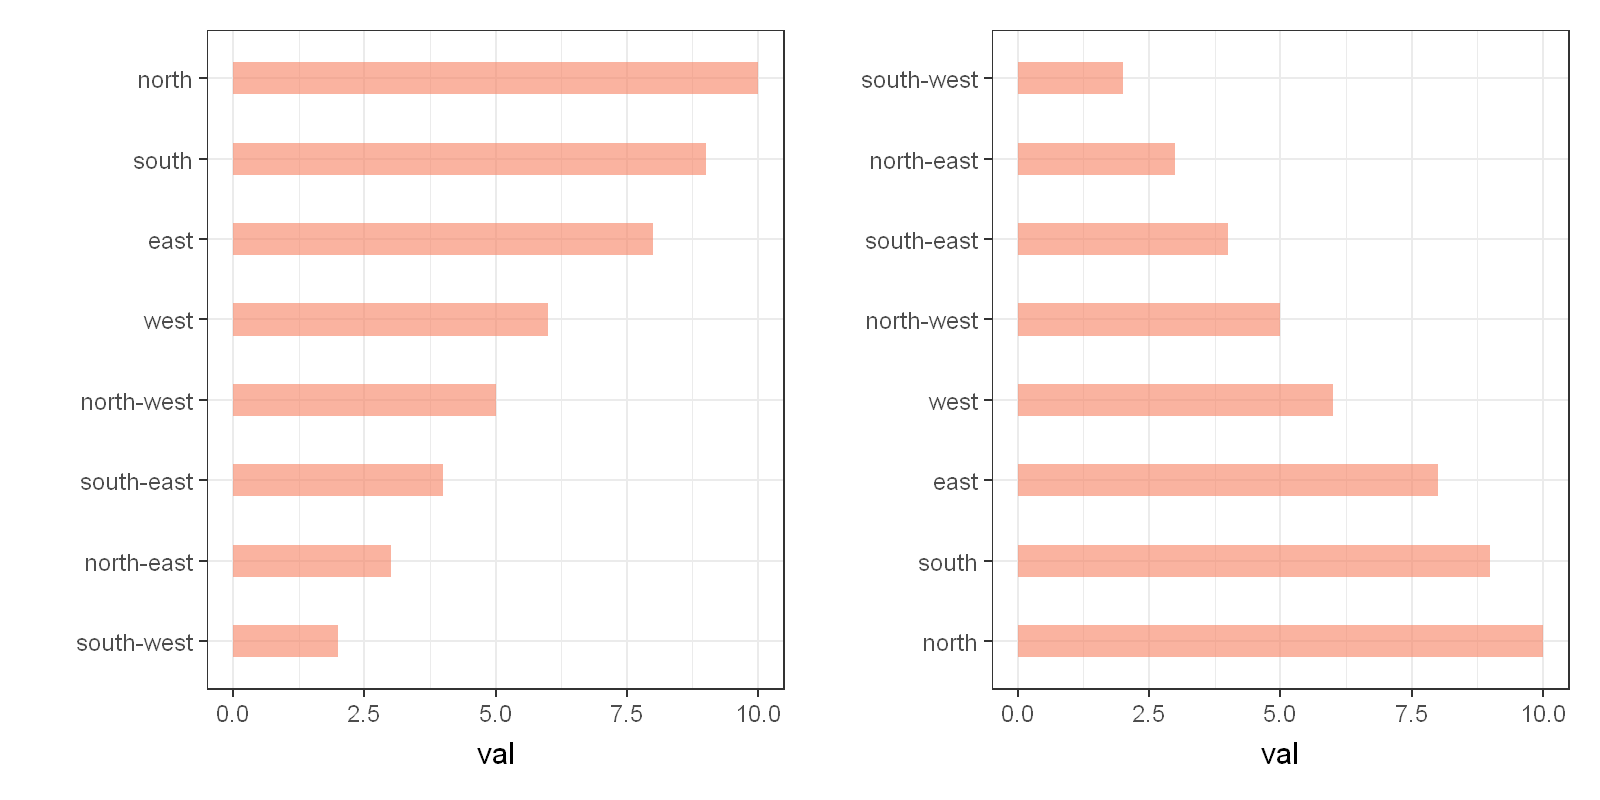

In [19]:
# Reorder following the value of another column:
g1 <- data %>%
  mutate(name = fct_reorder(name, val)) %>%
  ggplot( aes(x=name, y=val)) +
    geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) +
    coord_flip() +
    xlab("") +
    theme_bw()
 
# Reverse side
g2 <- data %>%
  mutate(name = fct_reorder(name, desc(val))) %>%
  ggplot( aes(x=name, y=val)) +
    geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) +
    coord_flip() +
    xlab("") +
    theme_bw()
g1+g2

#### อยากให้กราฟชนกัน ใช้ patchwork ตั้งชื่อกราฟทั้งสองแล้วเอามาบวกกัน


#### **ถ้า FACTOR มีข้อมูลหลายค่า สามารถใช้วิธี MEDIAN หรือ NUMBER OF OBSERVATION PER GROUP เพื่อแบ่งระดับข้อมูล**

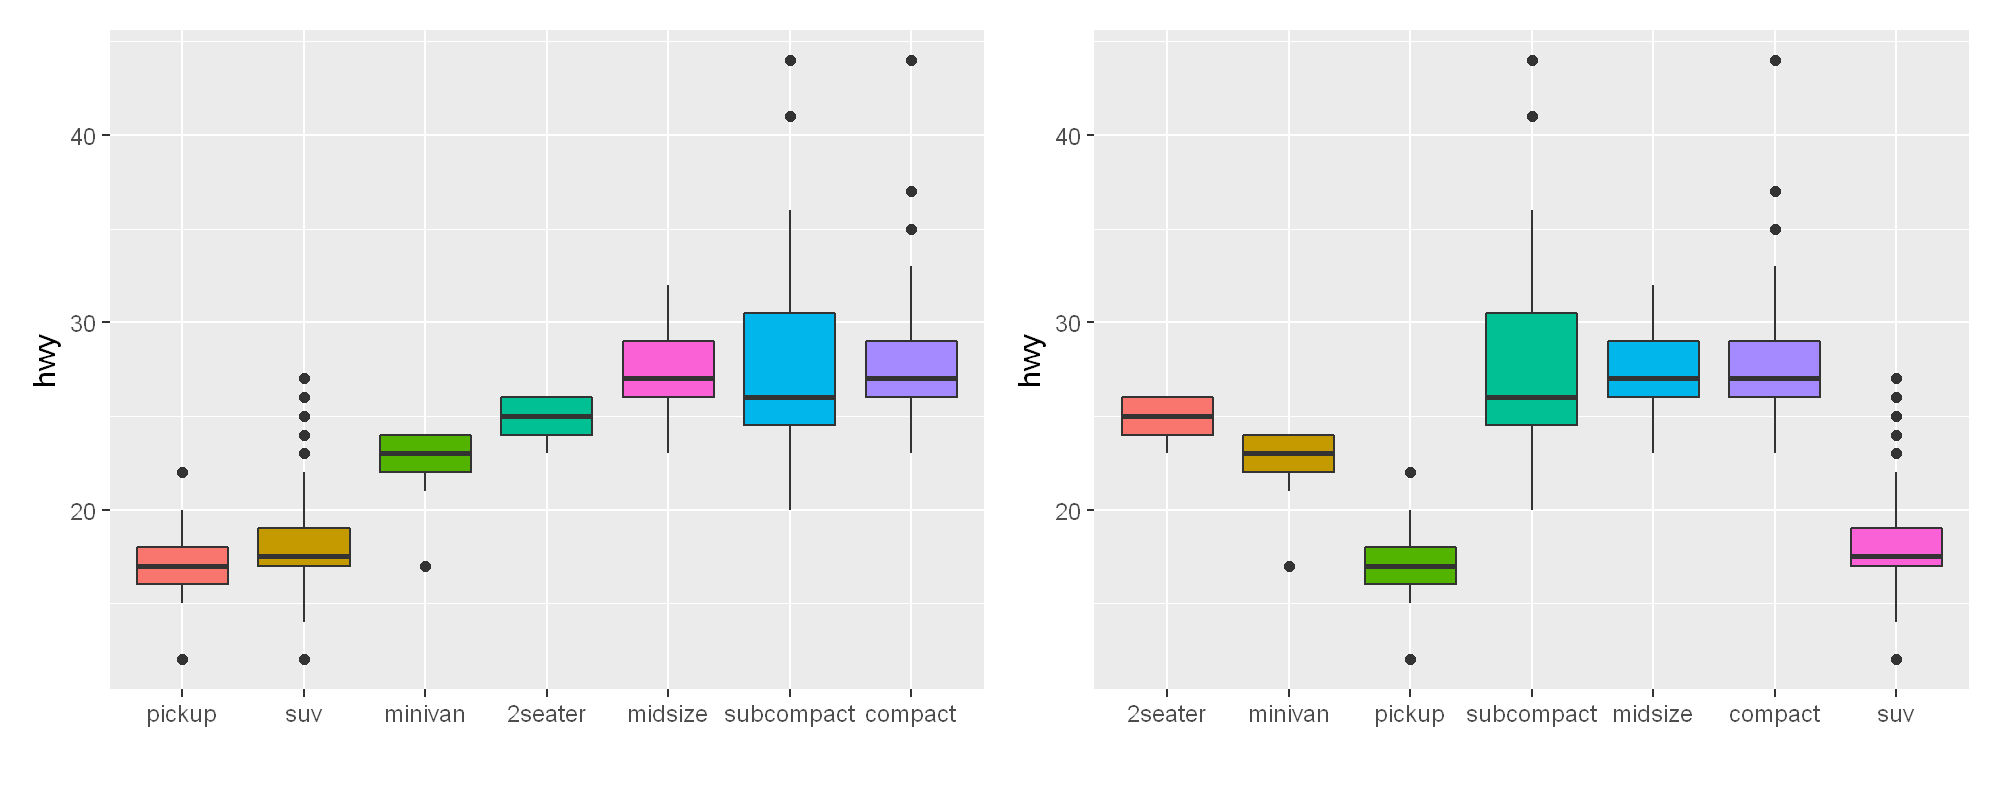

In [57]:
# Using median
g3 = mpg %>%
  mutate(class = fct_reorder(class, hwy, .fun='median')) %>%
  ggplot( aes(x=reorder(class, hwy), y=hwy, fill=class)) + 
    geom_boxplot() +
    xlab("class") +
    theme(legend.position="none") +
    xlab("")
 
# Using number of observation per group
g4 = mpg %>%
  mutate(class = fct_reorder(class, hwy, .fun='length' )) %>%
  ggplot( aes(x=class, y=hwy, fill=class)) + 
    geom_boxplot() +
    xlab("class") +
    theme(legend.position="none") +
    xlab("") +
    xlab("")
g3+g4

#####  **หรือใช้แบบง่ายๆ คือ ฟังก์ชั่น fct_relevel()**

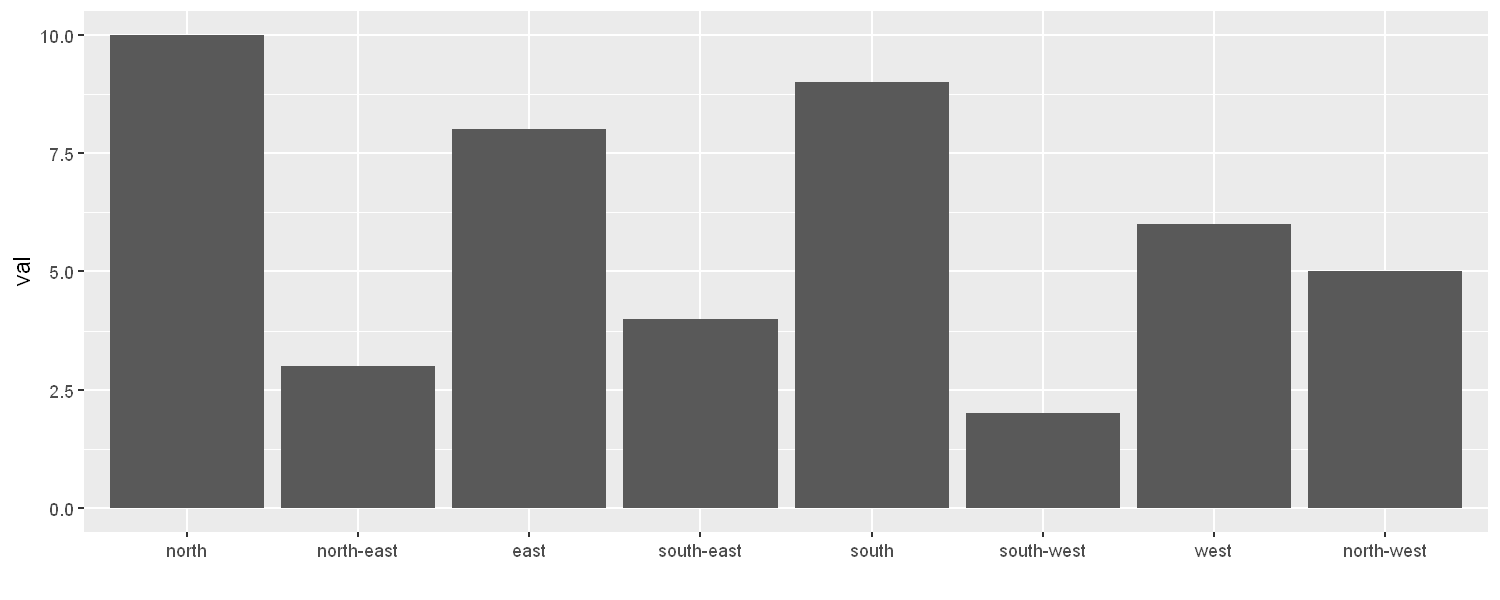

In [61]:
data %>%
  mutate(name = fct_relevel(name, 
            "north", "north-east", "east", 
            "south-east", "south", "south-west", 
            "west", "north-west")) %>%
  ggplot( aes(x=name, y=val)) +
    geom_bar(stat="identity") +
    xlab("")
    options(repr.plot.width  = 10, repr.plot.height = 3, repr.plot.res = 150)

### **วิธีที่ 2 ใช้ dplyr**

#### ใช้ฟังก์ชั่น mutate() ในการสร้างตัวแปรใหม่หรือตัวแปรที่มีอยู่แล้ว

  > #### 1. ใช้คำสั่ง arrange() เพื่อจัดเรียง dataframe ตามที่ต้องการ

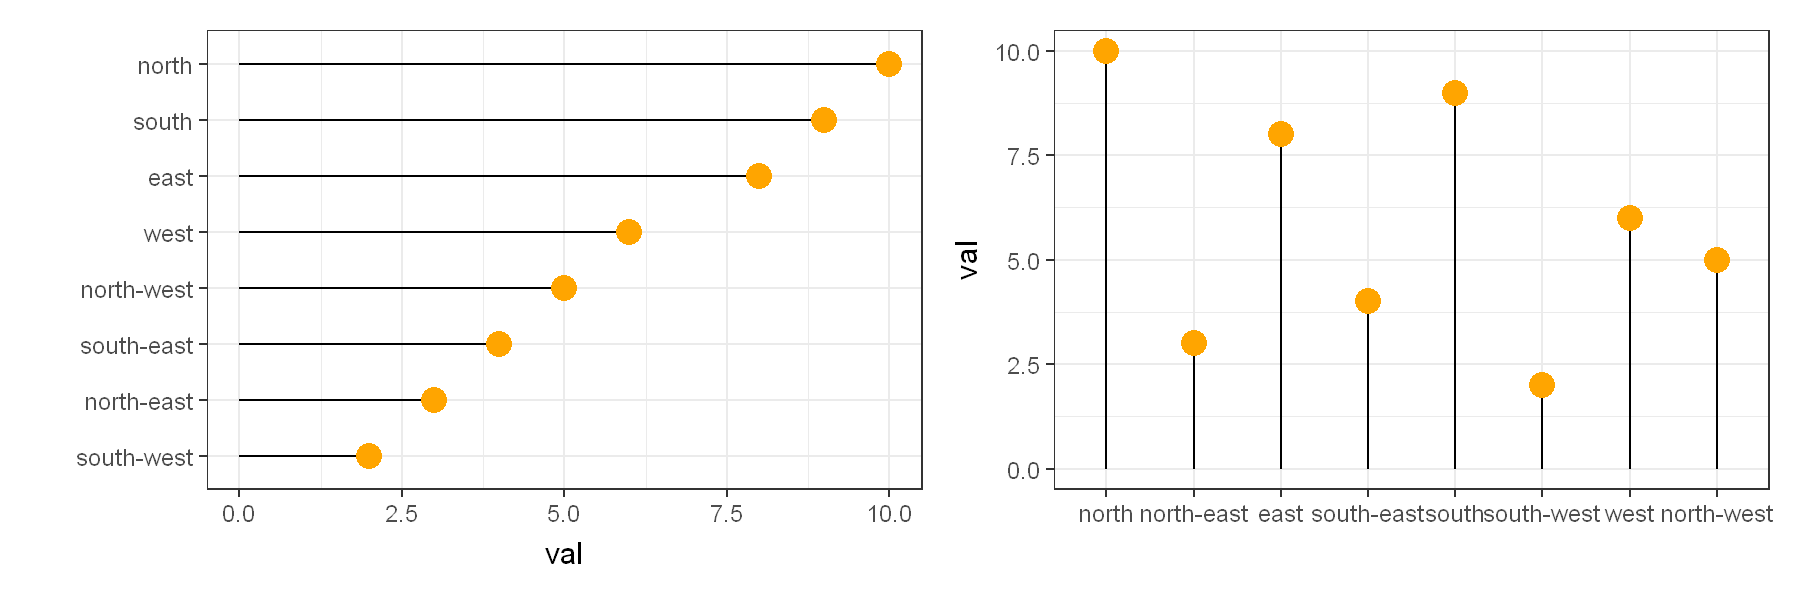

In [68]:
g5 = data %>%
  arrange(val) %>%    # First sort by val. This sort the dataframe but NOT the factor levels
  mutate(name=factor(name, levels=name)) %>%   # This trick update the factor levels
  ggplot( aes(x=name, y=val)) +
    geom_segment( aes(xend=name, yend=0)) +
    geom_point( size=4, color="orange") +
    coord_flip() +
    theme_bw() +
    xlab("")
 
g6 = data %>%
  arrange(val) %>%
  mutate(name = factor(name, levels=c("north", "north-east", "east", "south-east", "south", "south-west", "west", "north-west"))) %>%
  ggplot( aes(x=name, y=val)) +
    geom_segment( aes(xend=name, yend=0)) +
    geom_point( size=4, color="orange") +
    theme_bw() +
    xlab("")
    options(repr.plot.width  = 9, repr.plot.height = 3, repr.plot.res = 200)
g5 + g6

### **วิธีที่ 3 ใช้ฟังก์ชั่น reorder()**

####   **reorder() ในฟังก์ชั่น with()**

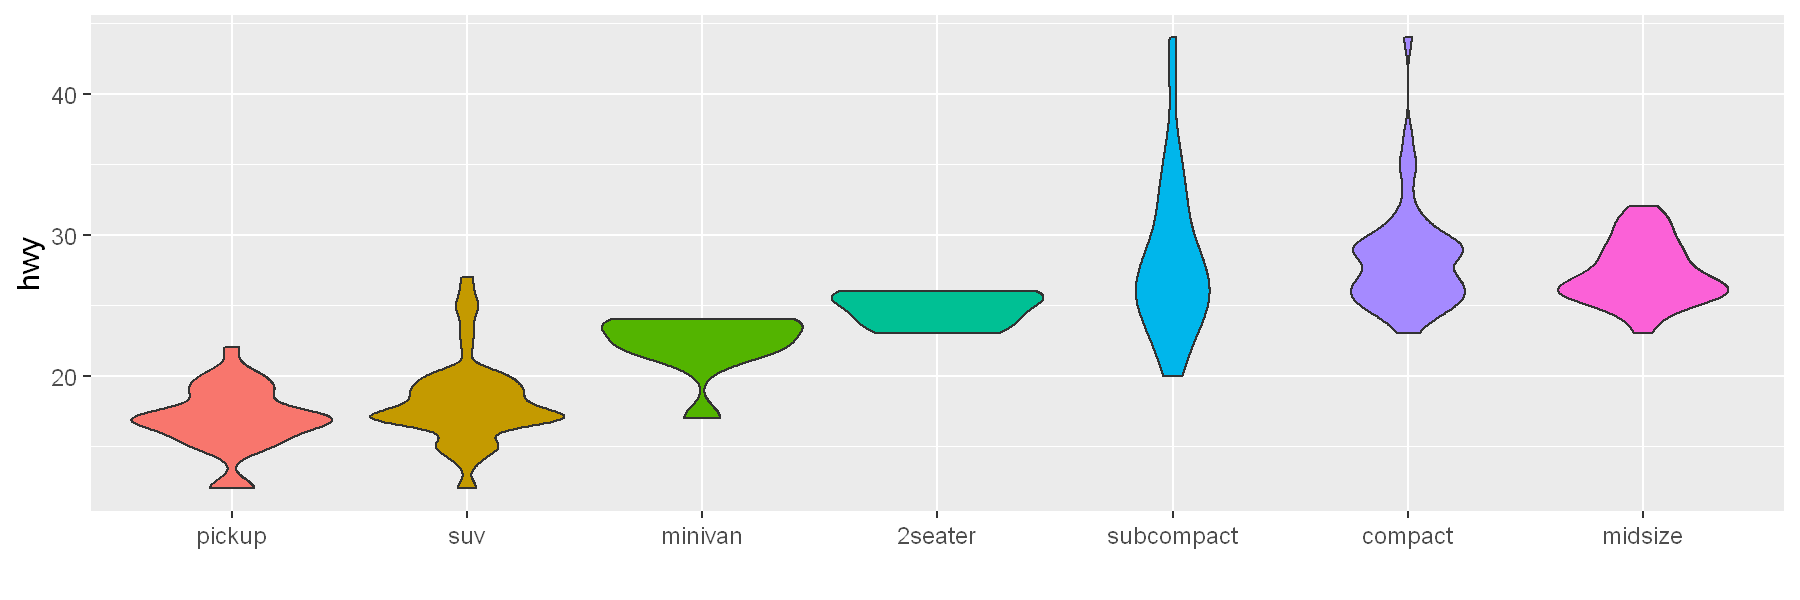

In [71]:
mpg$class = with(mpg, reorder(class, hwy, median))

 mpg %>%
  ggplot( aes(x=class, y=hwy, fill=class)) + 
    geom_violin() +
    xlab("class") +
    theme(legend.position="none") +
    xlab("")
